In [1]:
!wget https://raw.githubusercontent.com/core-rope-memory/DataMiningTechniques/master/task1_format_data.py
!wget https://raw.githubusercontent.com/core-rope-memory/DataMiningTechniques/master/task3_format_data.py
!wget https://raw.githubusercontent.com/core-rope-memory/DataMiningTechniques/master/test_data_sample.txt
!wget https://raw.githubusercontent.com/core-rope-memory/DataMiningTechniques/master/test_label_sample.txt
!wget https://raw.githubusercontent.com/core-rope-memory/DataMiningTechniques/master/label_training.txt
!wget https://raw.githubusercontent.com/core-rope-memory/DataMiningTechniques/master/test_sample.xlsx
!wget https://raw.githubusercontent.com/core-rope-memory/DataMiningTechniques/master/testing.txt
!wget https://raw.githubusercontent.com/core-rope-memory/DataMiningTechniques/master/training.txt
!wget https://raw.githubusercontent.com/core-rope-memory/DataMiningTechniques/master/UsedAutoRELEVATEfirst10000-noLatLong.csv
!wget https://raw.githubusercontent.com/core-rope-memory/DataMiningTechniques/master/data_nochanges.csv
!wget https://raw.githubusercontent.com/core-rope-memory/DataMiningTechniques/master/q3_results_18.txt
!wget https://raw.githubusercontent.com/core-rope-memory/DataMiningTechniques/master/q3_results_23.txt

--2020-09-03 03:13:06--  https://raw.githubusercontent.com/core-rope-memory/DataMiningTechniques/master/task1_format_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3505 (3.4K) [text/plain]
Saving to: ‘task1_format_data.py’

task1_format_data.p 100%[===================>]   3.42K  --.-KB/s    in 0s      

2020-09-03 03:13:07 (46.6 MB/s) - ‘task1_format_data.py’ saved [3505/3505]

--2020-09-03 03:13:07--  https://raw.githubusercontent.com/core-rope-memory/DataMiningTechniques/master/task3_format_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response..

## Task 1: Classification

In [2]:
#Chris Parks
#Variable to toggle whether or not to calculate new data for the
#Nearest Neighbor, Artificial Neural Network, and Ensemble Method Classifiers

#These classifiers can take a long time to run, so to save time,
#set to false to use data calculated from previous trials

#Set to true to run the classifiers and generate new output data

if 'toggle_calculations' in locals():
  toggle_calculations = not toggle_calculations
else:
  toggle_calculations = False

print("Toggle for calculating new data is: " + str(toggle_calculations))

Toggle for calculating new data is: False


### Data Preprocessing
The classification data is provided as two sets each containing a data text file and a label text file. The first set is used for training the model and the second set is used for testing the model. The data text file is in the long format for repeated measurement data. Data is in long format if each row contains one attribute value for an observation, therefore each observation will have multiple rows. Data is in wide format if each row corresponds to a single observation and each column corresponds to a single attribute value. [1]

The classification data text files were first read into a data frame using the Pandas Python library. For each data set, columns that were all nan values were removed as they provided no data. The data was read in so that the data frame would be in the wide format. This is sparse data, meaning observations in the training and testing data have many missing attribute values. Missing values were converted to a value of 0.

Because so many of the attributes for both the training data and testing data had no values, the union of the attribute IDs for training data and testing data were taken. Zero filled attribute columns where then added to both the training and testing datasets for attribute IDs that were present in the union but not in the dataset. In this way the minimum number of zero-filled columns were able to be added to both training and testing datasets to get both dataframes to the same shape (a requirement for the classification algorithms).

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

import task1_format_data as fd1

# Importing and pre-processing the data into dataframes that are formatted correctly.
X_TRAIN_PATH = "/content/training.txt"
Y_TRAIN_PATH = "/content/label_training.txt"

X_TEST_PATH = "/content/test_data_sample.txt"
Y_TEST_PATH = "/content/test_label_sample.txt"

x_train = fd1.data_txt_to_wide_df(X_TRAIN_PATH)
y_train = fd1.label_txt_to_df(Y_TRAIN_PATH)

x_test = fd1.data_txt_to_wide_df(X_TEST_PATH)
y_test = fd1.label_txt_to_df(Y_TEST_PATH)

col_id_union = fd1.get_data_attribute_union(x_train, x_test)

x_train = fd1.add_zero_cols_to_df(x_train, col_id_union)
x_test = fd1.add_zero_cols_to_df(x_test, col_id_union)

### Decision Tree Classification
In an attempt to find the most accurate classification for the decision tree classifier, multiple trees were created with different parameter values passed in for the most important parameters. These parameters were the maximum depth of the tree, and the maximum number of features to consider when looking for the best node split. By default, the sci-kit learn's decision tree classifier chooses a max depth such that all leaves are pure or until all leaves contain less than the minimum number of samples required to split an internal node, which is another parameter that can be passed by the user (2 by default). [2]

The maximum tree depth options that were tested ranged from 2 to 61, and for each of those tree depths the maximum number of features to consider when looking for the best split was set to the number of features in the tree, the square root of the number of features in the tree, or the log base 2 of the number of features in the tree respectively. A decision tree was then created using the training data and training labels, and then a prediction was made using the decision tree and the testing data. Once the prediction gave out an array of labe predictions for the testing data, the accuracy ratio of this prediction was calculated using the actual label array for the testing data.

In [4]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
depth = clf.get_depth()
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test.values, y_pred)

max_depth_accuracy = [[], [], []]

max_depth_options = list(range(2, 61))
max_features_options = [None, 'sqrt', 'log2']
for i, feature in enumerate(max_features_options):
    for depth in max_depth_options:
        clf = DecisionTreeClassifier(max_depth=depth, max_features=feature)
        clf = clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test.values, y_pred)
        max_depth_accuracy[i].append(accuracy)

Plots of the accuracy ratio versus the max depth of the tree used to make  the prediction were created and colorized by the maximum number of features used to calculate the internal node splits. Using the number of features in the tree as the maximum features to split produced the most consistently accurate results. Using the square-root of the features in the tree as the maximum features to split produced the next most accurate results, but there was much more variability in accuracy depending on the depth of the tree. Using the base-2-log of the features in the tree as the maximum features to split was the least accurate method and also had a large amount of variability based on the depth of the tree.

Overall the accuracies of the label predictions made by the decision trees was high, usually ranging between 70% and 96% accuracy rates.

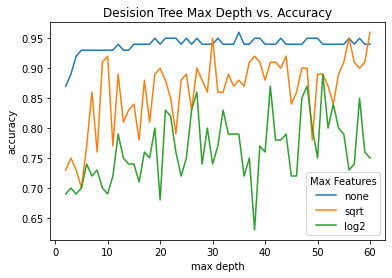

In [5]:
plt.plot(np.asarray(max_depth_options), np.asarray(max_depth_accuracy[0]), label='none')
plt.plot(np.asarray(max_depth_options), np.asarray(max_depth_accuracy[1]), label='sqrt')
plt.plot(np.asarray(max_depth_options), np.asarray(max_depth_accuracy[2]), label='log2')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.title("Desision Tree Max Depth vs. Accuracy")
plt.legend(title='Max Features')
plt.show('decision_tree.png')

### Passive Aggressive Classification (Cameron Howard)
This is the Passive Aggressive Classifier code. This type of classifier is ill-suited for our assignment, but I chose to try it out to investigate what kind of results it might have. The Passive Aggressive Classifier is typically used on large streams of data. It takes in a section of the stream and uses it to update its classifier, then throws that section out (and cannot retrieve it later). This would be used on a massive stream of data such as all of the post on Facebook going out throughout the day, or all the tweets on Twittter. However, since our project is just a simple classifcation over constant values in a file, this classifcation produces interesting (and not very dependable) results. The accuracy of this method can be seen to range from below 50% to near 100% depending on the run.

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier

accuracy_scores = [[], [], []]

num_iterations = list(range(10))

for _ in num_iterations:
    clf = PassiveAggressiveClassifier()
    clf = clf.fit(x_train, np.ravel(y_train))
    prediction = clf.predict(x_test)
    accuracy = accuracy_score(y_test.values, prediction)
    accuracy_scores[0].append(accuracy)
    print("PA (default) Accuracy: ", accuracy)

    clf = PassiveAggressiveClassifier(fit_intercept=True)
    clf = clf.fit(x_train, np.ravel(y_train))
    prediction = clf.predict(x_test)
    accuracy = accuracy_score(y_test.values, prediction)
    accuracy_scores[1].append(accuracy)
    print("PA (intercept) Accuracy: ", accuracy)

    clf = PassiveAggressiveClassifier(max_iter=5000)
    clf = clf.fit(x_train, np.ravel(y_train))
    prediction = clf.predict(x_test)
    accuracy = accuracy_score(y_test.values, prediction)
    accuracy_scores[2].append(accuracy)
    print("PA (five times iterations) Accuracy: ", accuracy)


PA (default) Accuracy:  0.84
PA (intercept) Accuracy:  0.88
PA (five times iterations) Accuracy:  0.86
PA (default) Accuracy:  0.88
PA (intercept) Accuracy:  0.92
PA (five times iterations) Accuracy:  0.85
PA (default) Accuracy:  0.91
PA (intercept) Accuracy:  0.89
PA (five times iterations) Accuracy:  0.92
PA (default) Accuracy:  0.93
PA (intercept) Accuracy:  0.91
PA (five times iterations) Accuracy:  0.9
PA (default) Accuracy:  0.97
PA (intercept) Accuracy:  0.94
PA (five times iterations) Accuracy:  0.6
PA (default) Accuracy:  0.93
PA (intercept) Accuracy:  0.56
PA (five times iterations) Accuracy:  0.93
PA (default) Accuracy:  0.83
PA (intercept) Accuracy:  0.84
PA (five times iterations) Accuracy:  0.93
PA (default) Accuracy:  0.89
PA (intercept) Accuracy:  0.86
PA (five times iterations) Accuracy:  0.91
PA (default) Accuracy:  0.61
PA (intercept) Accuracy:  0.85
PA (five times iterations) Accuracy:  0.93
PA (default) Accuracy:  0.92
PA (intercept) Accuracy:  0.79
PA (five times 

The plot shows each different parameter's accuracy as they ran a number of iterations over the same data. Sometimes drops can be seen as low as 49%. Although each iteration over the data is inconsistent, some of the classifications are close to 100% accuracy. However, the varying results make this a classifier to be avoided for the means of our project.

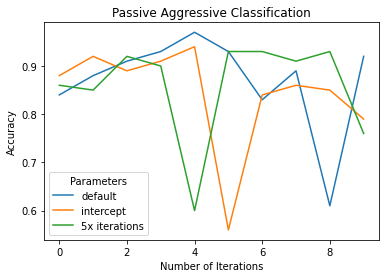

In [7]:
plt.plot(np.asarray(num_iterations), np.asarray(accuracy_scores[0]), label='default')
plt.plot(np.asarray(num_iterations), np.asarray(accuracy_scores[1]), label='intercept')
plt.plot(np.asarray(num_iterations), np.asarray(accuracy_scores[2]), label='5x iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title("Passive Aggressive Classification")
plt.legend(title='Parameters')
plt.show()

### Naive Bayes Classification (Cameron Howard)
This is the Naive Bayes code. It uses the format data to get the dataframes setup for the fit function. In this case I had to use the np.ravel() function as an extra step to match the dimensions for the fit parameter. As the testing parameters I used four different algorithms:

Gaussian: Assumes the likelihood of the features is Gaussian.

Multinomial: Used for multinomially distibuted data, usually used text classification.

Complement: Derived from Multinomial, meant for imbalanced data sets. Also usually used for text classification.

Bernoulli: Used on data that follows Bernoulli distributions. 

None of the Naive Bayes algorithms are particularly suited to this data set's limited classification. However, they all perform relatively well ranging from 96% - 98% accuracy. 

In [8]:
from sklearn.metrics import accuracy_score
import sklearn.naive_bayes as nb

accuracy_scores = []

clf = nb.GaussianNB()
clf = clf.fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)
accuracy = accuracy_score(y_test.values, prediction)
accuracy_scores.append(accuracy)
print("Gaussian Naive Bayes Accuracy: ", accuracy)

clf = nb.MultinomialNB()
clf = clf.fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)
accuracy = accuracy_score(y_test.values, prediction)
accuracy_scores.append(accuracy)
print("Multinomial Naive Bayes Accuracy: ", accuracy)

clf = nb.ComplementNB()
clf = clf.fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)
accuracy = accuracy_score(y_test.values, prediction)
accuracy_scores.append(accuracy)
print("Complement Naive Bayes Accuracy: ", accuracy)

clf = nb.BernoulliNB()
clf = clf.fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)
accuracy = accuracy_score(y_test.values, prediction)
accuracy_scores.append(accuracy)
print("Bernoulli Naive Bayes Accuracy: ", accuracy)


Gaussian Naive Bayes Accuracy:  0.98
Multinomial Naive Bayes Accuracy:  0.95
Complement Naive Bayes Accuracy:  0.95
Bernoulli Naive Bayes Accuracy:  0.98


The plot is a horizontal bar graph with each of the classifiers on the y-axis and the accuracy on the x-axis. They all performed well, but none of them hit 100%.

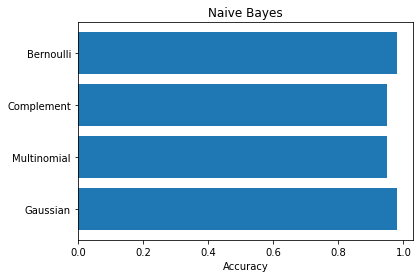

In [9]:
bars = ('Gaussian', 'Multinomial', 'Complement', 'Bernoulli')
y_pos = np.arange(len(bars))

plt.barh(y_pos, accuracy_scores, align='center')
plt.yticks(y_pos, bars)
plt.xlabel('Accuracy')
plt.title('Naive Bayes')

plt.show()

### Support Vector Machine (Cameron Howard)
This is the Support Vector Machine (SVM) code. It uses the format data to get the dataframes setup for the fit function. In this case I had to use the np.ravel() function as an extra step to match the dimensions for the fit parameter. The loop tests different kernel options (which are just the algorithms that the SVM is using to determine its classifications) with different gamma options (which are just kernel coeffiecients [Auto = (1/n) and Scale = (1/(n*variance of x))]. The kernels used are rbf (radial basis function [this is the deafult option]), polynomial, sigmoid, and linear. Linear gets tested after the loop to avoid using unnecessary processing time on parameters it would just ignore. Polynomial gets tested using differing degrees (1-4).

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

accuracy_scores = []
kernel_opts = ['rbf', 'poly', 'sigmoid']  # cases
gamma_opts = ['auto', 'scale']            # used by all 3 cases
degree_opts = list(range(1, 5))           # poly, ignored by others

for k in kernel_opts:
    for g in gamma_opts:
        if k == 'poly':
            for d in degree_opts:
                clf = SVC(kernel=k, gamma=g, degree=d)
                clf = clf.fit(x_train, np.ravel(y_train))
                prediction = clf.predict(x_test)
                accuracy = accuracy_score(y_test.values, prediction)
                accuracy_scores.append(accuracy)
                print("Kernel: ", k, "; Gamma: ", g, "; Degree: ", d, "; Accuracy: ", accuracy)
        else:
            clf = SVC(kernel=k, gamma=g)
            clf = clf.fit(x_train, np.ravel(y_train))
            prediction = clf.predict(x_test)
            accuracy = accuracy_score(y_test.values, prediction)
            accuracy_scores.append(accuracy)
            print("Kernel: ", k, "; Gamma: ", g, "; Accuracy: ", accuracy)

clf = SVC(kernel='linear')
clf = clf.fit(x_train, np.ravel(y_train))
prediction = clf.predict(x_test)
accuracy = accuracy_score(y_test.values, prediction)
accuracy_scores.append(accuracy)
print("Kernel: ", "linear", "; Gamma: ", "Auto", "; Accuracy: ", accuracy)

Kernel:  rbf ; Gamma:  auto ; Accuracy:  0.69
Kernel:  rbf ; Gamma:  scale ; Accuracy:  0.7
Kernel:  poly ; Gamma:  auto ; Degree:  1 ; Accuracy:  0.72
Kernel:  poly ; Gamma:  auto ; Degree:  2 ; Accuracy:  0.8
Kernel:  poly ; Gamma:  auto ; Degree:  3 ; Accuracy:  0.73
Kernel:  poly ; Gamma:  auto ; Degree:  4 ; Accuracy:  0.69
Kernel:  poly ; Gamma:  scale ; Degree:  1 ; Accuracy:  0.7
Kernel:  poly ; Gamma:  scale ; Degree:  2 ; Accuracy:  0.7
Kernel:  poly ; Gamma:  scale ; Degree:  3 ; Accuracy:  0.7
Kernel:  poly ; Gamma:  scale ; Degree:  4 ; Accuracy:  0.7
Kernel:  sigmoid ; Gamma:  auto ; Accuracy:  0.69
Kernel:  sigmoid ; Gamma:  scale ; Accuracy:  0.7
Kernel:  linear ; Gamma:  Auto ; Accuracy:  1.0


It compiles the results into a horizontal bar graph that shows accuracy on the x-axis and each tested kernel with its parameters on the y. Linear was by far the best result with 100% accuracy. The rest hovered around 70% while polynomial of degree 2 with auto gamma got to 80% There are currently commented out print statements that show the accuracy of each run, but these can be added back in if you want to see the printed results as well as the graph on your screen.

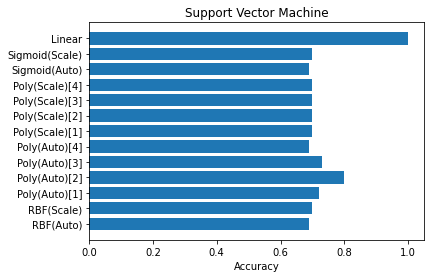

In [11]:
bars = ('RBF(Auto)', 'RBF(Scale)', 'Poly(Auto)[1]', 'Poly(Auto)[2]', 'Poly(Auto)[3]', 'Poly(Auto)[4]',
        'Poly(Scale)[1]', 'Poly(Scale)[2]', 'Poly(Scale)[3]', 'Poly(Scale)[4]', 'Sigmoid(Auto)', 'Sigmoid(Scale)',
        'Linear')
y_pos = np.arange(len(bars))

plt.barh(y_pos, accuracy_scores, align='center')
plt.yticks(y_pos, bars)
plt.xlabel('Accuracy')
plt.title('Support Vector Machine')

plt.show()


### Nearest Neighbor Classification (Chris Parks)
Nearest neighbors classifiers attempt to use nearby data points to try and classify a record. Since this data is relatively sparse, this classifier was not expected to do particularly well. The only parameter to realistically tune was the number of nearby neighbors to consider.

The number of neighbors that were tested ranged between 1 and 100. The classifier was fitted using the training data and training labels, and then a prediction was made using the testing data. The output was compared against the testing labels and stored in the results array to be graphed.

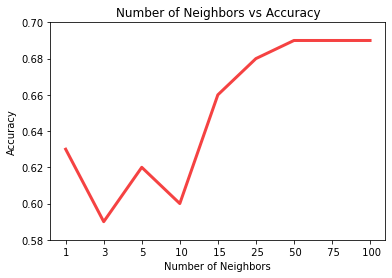

In [12]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

num_neighbors_options = [1, 3, 5, 10, 15, 25, 50, 75, 100]
neighbors_labels = ['1',' 3',' 5',' 10',' 15',' 25',' 50',' 75',' 100']
results = []

if(toggle_calculations):
    #Calculate new results
    for num_neighbors in num_neighbors_options:
        clf = KNeighborsClassifier(n_neighbors=num_neighbors,weights='uniform')
        clf.fit(x_train, np.ravel(y_train,order='C'))
        
        y_pred = clf.predict(x_test)
        accuracy = sklearn.metrics.accuracy_score(y_test.values, y_pred)
        results.append(accuracy)
        print("num_neighbors: ", str(num_neighbors), "; accuracy: ", accuracy)

else:
    #Results obtained from a previous run; Allows quick adjustments of matplotlib parameters
    results = [0.63, 0.59, 0.62, 0.6, 0.66, 0.68, 0.69, 0.69, 0.69]

plt.plot(neighbors_labels, results, markerfacecolor='#f54242', markersize=12, color='#f54242', linewidth=3)
plt.ylim([0.58,0.7])
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title("Number of Neighbors vs Accuracy")
plt.show()

### Artificial Neural Network / Multi-Layer Perceptron (Chris Parks)
The multi-layer merceptron classifier has many parameters that can be tuned: the solvers, the activator functions, the number of hidden layers, and the size of each hidden layer.

For this classifier, I decided to stick to one hidden layer because of the large number of perumatations already provided by the other parameters.

The available solvers were 'lbfgs', 'sgd', and 'adam'. [LBFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS) stands for 'Limited-Memory Broyden Fletcher Goldfarb Shanno algorithm', and utilizes an inverse [Hessian matrix](https://en.wikipedia.org/wiki/Hessian_matrix) to predict the state of variables. [SGD](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) stands for Stochastic Gradient Descent, and aims to minimize an objective function to find the best prediction. ADAM is based on SGD, but runs 'averages of both the gradients and the second moments of the gradients' ([Source](https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam)).

The activator functions built into the classifier are nonlinear activation functions, so they 'model the frequency of [action potentials](https://en.wikipedia.org/wiki/Action_potentials), or firing, of biological neurons' ([Source](https://en.wikipedia.org/wiki/Multilayer_perceptron#Activation_function)). The activator functions built into the classifier are:

| Name | Function |
| ---- | -------- |
| Identity | f(x) = x |
| Logistic | f(x) = 1 / (1 + exp(-x)) |
| Hyperbolic Tangent | f(x) = tanh(x) |
| RELU | f(x) = max(0, x) |

Lastly, the number of neurons in the hidden layer have been chosen to vary between 10, 20, 30, and 40 in order to provide a wide array of coverage (will a small number of neurons perform better than a large number, or vice versa).



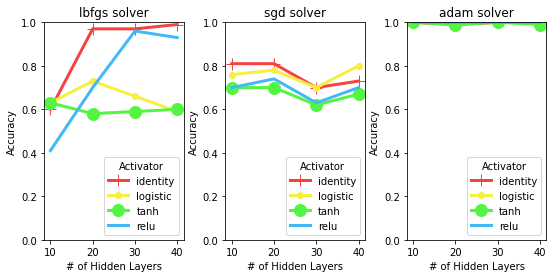

In [13]:
import sklearn
from sklearn.neural_network import MLPClassifier

results = []
solvers = ['lbfgs', 'sgd', 'adam'] #sgd = stochastic gradient descent
activators = ['identity','logistic', 'tanh', 'relu'] #logistic = sigmoid
hidden_layer_sizes = [10,20,30,40]
hidden_layer_sizes_label = ['10','20','30','40']


if(toggle_calculations):
    #Calculate new results
    x=0
    for solver in solvers:
        results.append([])
        y=0
        for activator in activators:
            results[x].append([])
            z=0
            for hl_size in hidden_layer_sizes:
                results[x][y].append([])
                clf = MLPClassifier(solver=solver,alpha=1e-5,hidden_layer_sizes=(hl_size,),activation=activator,random_state=1)
                clf.fit(x_train, np.ravel(y_train,order='C'))
                y_pred = clf.predict(x_test)
                accuracy = sklearn.metrics.accuracy_score(y_test.values, y_pred)
                print("solver: ", solver, "; activator: ",activator,"; hidden_layer_size: ",str(hl_size),"; accuracy: ", accuracy)
                results[x][y][z] = accuracy
                z+=1
            y+=1
        x+=1

else:
    #Results obtained from a previous run; Allows quick adjustments of matplotlib parameters
    results = [[[0.6, 0.97, 0.97, 0.99], [0.63, 0.73, 0.66, 0.59], [0.63, 0.58, 0.59, 0.6], [0.41, 0.7, 0.96, 0.93]], [[0.81, 0.81, 0.7, 0.73], [0.76, 0.78, 0.7, 0.8], [0.7, 0.7, 0.62, 0.67], [0.7, 0.74, 0.63, 0.7]], [[1.0, 0.99, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0], [1.0, 0.99, 1.0, 0.99], [1.0, 1.0, 1.0, 1.0]]]

markers = ['+','.','o',',']
colors = ['#f54242','#f5ef42','#54f542','#42b9f5']

plt.figure(figsize=(9,4))
for a in range(0,3):
    ax = plt.subplot(131 + a)
    ax.set_xlabel('# of Hidden Layers')
    ax.set_ylabel('Accuracy')
    for b in range(0,4):
        plt.plot( hidden_layer_sizes_label, results[a][b], marker=markers[b], markerfacecolor=colors[b], markersize=12, color=colors[b], linewidth=3)
        plt.ylim([0.0,1.0])
        
    plt.legend(activators,loc='lower right',title='Activator')
    plt.title(solvers[a] + " solver")
plt.subplots_adjust(wspace=0.3)
plt.show()

### Ensemble Methods (Chris Parks)
Ensemble methods aim to take several weak estimators and aggregate their predictions to form a stronger final prediction.

Two ensemble methods were chosen: Bagging and AdaBoost.

#### Bagging

Bagging takes a subset of the data at random (with replacement). It uses a base estimator to fit the data on these random subsets, then aggregates their predictions to form the final prediction. For this classifier, I used a Nearest Neighbor classifier as the base estimator.

Parameters to tune include the number of estimators to use (which varied from 2 to 4 to 6) and the percentage of samples to use for each subset (which ranged from 20% to 50%, increasing at 10% intervals).

Unfortunately, due to memory constraints, the number of estimators could not increase beyond 6.

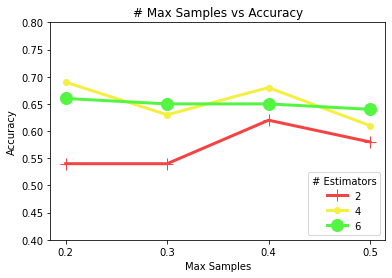

In [14]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

results = []
num_estimators_options = [2, 4, 6]
est_labels = ['2','4','6']
max_samples_options = [0.2, 0.3, 0.4, 0.5]
samples_labels = ['0.2','0.3','0.4','0.5']

if(toggle_calculations):
    #Calculate new results
    x=0
    for num_estimators in num_estimators_options:
        results.append([])
        for max_samples in max_samples_options:
            clf = BaggingClassifier(base_estimator=KNeighborsClassifier(),max_samples=max_samples, max_features=0.75,n_estimators=num_estimators)
            clf.fit(x_train, np.ravel(y_train,order='C'))
            y_pred = clf.predict(x_test)
            accuracy = sklearn.metrics.accuracy_score(y_test.values, y_pred)
            print("max_samples: ", str(max_samples), "; num_estimators: ", str(num_estimators)," accuracy: ", accuracy)
            results[x].append(accuracy)
        x+=1

else:
    #Results obtained from a previous run; Allows quick adjustments of matplotlib parameters
    results = [[0.54, 0.54, 0.62, 0.58], [0.69, 0.63, 0.68, 0.61], [0.66,0.65,0.65,0.64]]

markers = ['+','.','o',',']
colors = ['#f54242','#f5ef42','#54f542','#42b9f5']

for a in range(0,3):
    plt.plot(samples_labels, results[a],marker=markers[a], markerfacecolor=colors[a], markersize=12, color=colors[a], linewidth=3)
    plt.ylim([0.4,0.8])
plt.xlabel('Max Samples')
plt.ylabel('Accuracy')
plt.legend(est_labels,loc='lower right',title='# Estimators')
plt.title("# Max Samples vs Accuracy")
plt.show()

#### AdaBoost

AdaBoost works by improving its weak estimators over several iterations. Instead of working on a subset of data, the estimators are tweaked to try and correctly classify records that were misclassified last time.

The main two parameters to tweak are the number of estimators and the learning rate. However, because scikit claims there is a trade off between these two parameters, and because of how effective the classifier is with just the default learning rate, the learning rate was not adjusted. Instead, just the number of estimators were adjusted to values in between 10 and 200.

Again, this demonstrated that AdaBoost is a powerful technique, even with a low amount of estimators, and that increasing the number of estimators gives sharp diminishing returns in regards to accuracy.

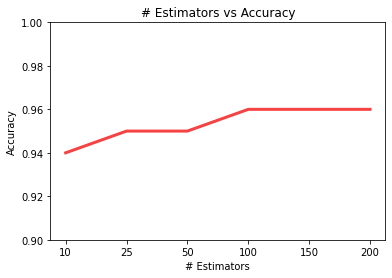

In [15]:
import sklearn
from sklearn.ensemble import AdaBoostClassifier

results = []
num_estimators_options = [10, 25, 50, 100, 150, 200]
est_labels = ['10','25','50','100','150','200']

if(toggle_calculations):
    #Calculate new results
    for n_estimators in num_estimators_options:
        clf = AdaBoostClassifier(n_estimators=n_estimators)
        clf.fit(x_train, np.ravel(y_train,order='C'))
        y_pred = clf.predict(x_test)
        accuracy = sklearn.metrics.accuracy_score(y_test.values, y_pred)
        results.append(accuracy)
        print("num_estimators: ", str(n_estimators), " accuracy: ", accuracy)

else:
    #Results obtained from a previous run; Allows quick adjustments of matplotlib parameters
    results = [0.94,0.95,0.95,0.96,0.96,0.96]

plt.plot(est_labels, results, markerfacecolor='#f54242', markersize=12, color='#f54242', linewidth=3) #identity
plt.ylim([0.9,1.0])
plt.xlabel('# Estimators')
plt.ylabel('Accuracy')
plt.title("# Estimators vs Accuracy")
plt.show()

## Task 3: Exploring Used Auto Purchase Dataset

### Decision Tree Hypothesis Testing

#### **Hypothesis**
The goal for this experiment was to test the hypothesis that hand-picked attributes from the used auto purchase dataset could be used to find correlations to the vehicle-type that a customer would buy. The attributes chosen for the training and testing datasets were those that were believed might be individually correlated to this choice. For the label vehicle type, the class can be one of four values: Car, Truck, Van, or SUV.

#### **Data Preprocessing**
The used auto purchase dataset was first read into a Pandas DataFrame. Extraneous rows were removed from the DataFrame, and then the DataFrame was filtered down to only include those attributes that were chosen to be tested. Those attributes were as follows:

* BehaviorBank: Internet/Online Subscriber
* BehaviorBank: Donates to Environmental Causes
* BehaviorBank: Interest in Foreign Travel
* BehaviorBank: Interest in Automotive
* BehaviorBank: Interest in Reading
* BehaviorBank: Interest in Travel
* BehaviorBank: Cat Enthusiast
* BehaviorBank: Interest in Domestic Travel
* MOR Bank Religious Contributor
* MOR Bank - Upscale Merch Buyer
* MOR Bank Do-It-Yourselfers
* MOR Bank Male Sports Magazine
* Ethnic Insight - Experian Group Code - Use this for group
* Rural Urban County Size Code
* Dwelling Type
* Home Heat Indicator
* Home Fireplaces
* Home Property Indicator
* Person Education
* Gender Code
* Presence of E-mail
* Homeowner Probability Model

This set of attributes consisted of continuous, discrete, and categorical value types. All of the values were converted to numerical floats for the decision tree classification algorithm. This was a sparse dataset, so all nan values were replaced with values of zero. The label attribute was put into its own single column DataFrame. There were 9999 records in the DataFrame. The first 7000 records were chosen for the training of the decision tree model and the last 2999 records were chosen for the testing of the prediction array.

#### **Results From Hand-Picked Attributes**

Parameter tuning was used to find the best prediction accuracy rate for the decision tree classifier. Accuracy scores were taken from models constructed with all 2808 combinations of the maximum depth parameter from 1 to 40, the minimum sample split parameter from 2 to 20, and the maximum feature parameter as the default value, the full number, square root, and log base two of the total number of features in the tree. The miminum accuracy rate from these combinations was around 45% and the maximum accuracy rate was around 55%. Exaxt values can be seen below as well as the parameter values that were used to construct the decision tree.

In [16]:
import pandas
import graphviz
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

from task3_format_data import auto_csv_to_df, reformat_auto_data_vals

pandas.options.mode.chained_assignment = None  # default='warn'

USED_AUTO_DATA_PATH = "/content/UsedAutoRELEVATEfirst10000-noLatLong.csv"

auto_df = auto_csv_to_df(USED_AUTO_DATA_PATH)
auto_df = reformat_auto_data_vals(auto_df)

# keep only selected attributes
x_data = auto_df.loc[:, (
    'BehaviorBank: Internet/Online Subscriber',
    'BehaviorBank: Donates to Environmental Causes',
    'MOR Bank Religious Contributor',
    'Rural Urban County Size Code',
    'BehaviorBank: Interest in Foreign Travel',
    'Ethnic Insight - Experian Group Code - Use this for group',
    'BehaviorBank: Interest in Automotive',
    'MOR Bank - Upscale Merch Buyer',
    'Dwelling Type',
    'MOR Bank Do-It-Yourselfers',
    'MOR Bank Male Sports Magazine',
    'BehaviorBank: Interest in Reading',
    'BehaviorBank: Interest in Travel',
    'Home Heat Indicator',
    'BehaviorBank: Cat Enthusiast',
    'BehaviorBank: Interest in Domestic Travel',
    'Home Fireplaces',
    'Home Property Indicator',
    'Person Education',
    'Gender Code',
    'Presence of E-mail',
    'Homeowner Probability Model')]

# replace string codes with numerical values
x_data.loc[:, 'BehaviorBank: Internet/Online Subscriber'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'BehaviorBank: Donates to Environmental Causes'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'BehaviorBank: Interest in Foreign Travel'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'BehaviorBank: Interest in Automotive'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'BehaviorBank: Interest in Reading'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'BehaviorBank: Interest in Travel'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'BehaviorBank: Cat Enthusiast'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'BehaviorBank: Interest in Domestic Travel'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'Presence of E-mail'].replace({'U': 0, 'Y': 1}, value=None, inplace=True)
x_data.loc[:, 'Dwelling Type'].replace({'A': 1, 'M': 2, 'P': 3, 'S': 4}, value=None, inplace=True)
x_data.loc[:, 'Gender Code'].replace({'B': 1, 'F': 2, 'M': 3, 'U': 4, 'A': 5}, value=None, inplace=True)
x_data.loc[:, 'Homeowner Probability Model'].replace({0: 1, 101: 2, 102: 3}, value=None, inplace=True)

# fill nan values with -1
x_data.fillna(0, inplace=True)

y_label = auto_df[['Vehicle Type']]
y_label['Vehicle Type'].replace({'CAR': 1, 'SUV': 2, 'TRUCK': 3, 'VAN': 4}, value=None, inplace=True)

x_data_training = x_data.iloc[1:7000]
x_data_testing = x_data.iloc[7001:]

y_label_training = y_label.iloc[1:7000]
y_label_testing = y_label.iloc[7001:]

trials_list = []

max_acc_val = 0

for depth in range(1, 40):
    for min_samp in range(2, 20):
        for max_feat in [None, 'auto', 'sqrt', 'log2']:
            clf = tree.DecisionTreeClassifier(
                max_depth=depth,
                min_samples_split=min_samp,
                max_features=max_feat,
            )
            clf = clf.fit(x_data_training, y_label_training)

            depth = clf.get_depth()

            y_pred = clf.predict(x_data_testing)
            accuracy = accuracy_score(y_label_testing.values, y_pred)

            if accuracy > max_acc_val:
                max_acc_val = accuracy
                max_clf = clf

            trials_list.append(
                {
                    'accuracy': accuracy,
                    'max_depth': depth,
                    'min_samples_split': min_samp,
                    'max_features': max_feat
                }
            )

trials_list = sorted(trials_list, key=lambda i: i['accuracy'])
trial_max_acc = trials_list[-1]
trial_min_acc = trials_list[0]
trials_count = len(trials_list)

print(f"number of trials: {trials_count}\n")
print(f"min accuracy trial:\naccuracy: {trial_min_acc['accuracy']}\nmax_depth: {trial_min_acc['max_depth']}\nmin_samples_split: {trial_min_acc['min_samples_split']}\nmax_features: {trial_min_acc['max_features']}\n")
print(f"max accuracy trial:\naccuracy: {trial_max_acc['accuracy']}\nmax_depth: {trial_max_acc['max_depth']}\nmin_samples_split: {trial_max_acc['min_samples_split']}\nmax_features: {trial_max_acc['max_features']}\n\n")

y_pred = max_clf.predict(x_data_testing)
accuracy = accuracy_score(y_label_testing.values, y_pred)


number of trials: 2808

min accuracy trial:
accuracy: 0.46597731821214144
max_depth: 25
min_samples_split: 2
max_features: None

max accuracy trial:
accuracy: 0.5500333555703802
max_depth: 5
min_samples_split: 14
max_features: auto




#### **Accuracy Check with Bad Data**

The accuracy ratios obtained from the hand-piced attribute decision trees were not good, hovering around the 50% level. To test if there was any correlation at all between the hand-picked attributes and which vehicle type the customer would by a training dataset was created with the same shape as the original training dataset, but filled with all zeros. This would create a decision tree of a single node, and no predictive capabilities. The resulting decision tree classifier guessed 'Car' for every label prediction in the testing dataset and was correct around 55% of the time because around 55% of the testing labels had a value of 'Car'. At this point it was determined that the hand-picked attributes had no correlation to the type of vehicle that the customer would buy.


In [17]:
"""
Test on a zero array of the same dimensions as the regular training data array.
"""

num_rows = auto_df.shape[0]
zeros = np.zeros(shape=(num_rows, 22))
zdf = pandas.DataFrame(zeros)
x_data_blank = zdf

x_data_training_blank = x_data_blank[1:7000]

clf_blank = tree.DecisionTreeClassifier()
clf_blank = clf_blank.fit(x_data_training_blank, y_label_training)

depth = clf_blank.get_depth()

y_pred = clf_blank.predict(x_data_testing)
accuracy = accuracy_score(y_label_testing.values, y_pred)

print(f"depth of tree: {depth}")
print(f"prediction accuracy: {accuracy}\n")

depth of tree: 0
prediction accuracy: 0.5470313542361575



#### **Attributes with Less Than 50% NAN Values**

Instead of hand-picking attributes to find correlations to the vehicle type, only attributes that had less than 50% NAN values for all 9999 observations were chosen for the training and testing datasets. This reduced the number of features to 195. Before this was done, all attributes relating to the vehicle purchased were removed, as the goal was to test whether customer behavioral traits correlated to the type of vehicle the customer.

For the first run of this experiment, the accuracy rate of the decision tree predictions dropped to around 35%.

In [18]:
from task3_format_data import df_perc_nan_less_than, categorical_to_numerical, column_percent_nan

auto_df = auto_csv_to_df(USED_AUTO_DATA_PATH)
auto_df = reformat_auto_data_vals(auto_df)

# keep only columns with less than 50% nans
filtered_df = df_perc_nan_less_than(auto_df, 0.5)

# convert categorical columns to numerical values
filtered_df = categorical_to_numerical(filtered_df)

names = list(filtered_df.columns)

x_data = filtered_df
x_data = x_data.drop(
    ['Acct#',
     'Model 1',
     'Engine Cylinders',
     'Vehicle 1 Trim',
     'Engine Size',
     'Drive Type',
     'Fuel Type',
     'Make 1',
     'Engine Block',
     'Year 1',
     'Vehicle Type'
     ], axis=1
)
y_label = filtered_df[['Vehicle Type']]

x_data_training = x_data.iloc[1:7000]
x_data_testing = x_data.iloc[7001:]

y_label_training = y_label.iloc[1:7000]
y_label_testing = y_label.iloc[7001:]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_data_training, y_label_training)

depth = clf.get_depth()

y_pred = clf.predict(x_data_testing)
accuracy = accuracy_score(y_label_testing.values, y_pred)

print(f"depth of tree: {depth}")
print(f"prediction accuracy: {accuracy}")
print(f"number of features: {clf.n_features_}")

depth of tree: 52
prediction accuracy: 0.3882588392261508
number of features: 195


For the second run of this experiment, only features with a feature importance value greater than 0.1 were kept in the training set. This reduced the number of features to two. The accuracy rate for this decision tree's prediction was around 40%, an improvement over the first round, but worse than the hand-picked attribute experiment.

In [19]:
feature_importance = clf.feature_importances_
important_features_cols = []
for i, v in enumerate(list(feature_importance)):
    important_features_cols.append((i, v))
important_features_cols.sort(key=lambda x: x[1], reverse=True)

names = list(x_data_testing.columns)
important_features_cols = [i for i in important_features_cols if i[1] > 0.1]

names_filtered = []
for i in important_features_cols:
    names_filtered.append(names[i[0]])

x_data_2 = x_data[names_filtered]
x_data_2_training = x_data_2.iloc[1:7000]
x_data_2_testing = x_data_2.iloc[7001:]

clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(x_data_2_training, y_label_training)

depth = clf2.get_depth()

y_pred = clf2.predict(x_data_2_testing)
accuracy = accuracy_score(y_label_testing.values, y_pred)

print(f"depth of tree: {depth}")
print(f"prediction accuracy: {accuracy}")
print(f"number of features: {clf2.n_features_}")

depth of tree: 36
prediction accuracy: 0.36924616410940625
number of features: 3


For the third run of this experiment certain attributes relating to the vehicle being purchased were allowd back into the training dataset such as engine size and engine cylinders. Vehicle attributes that would have provided too much of a correlation were kept out of the training set, such as the model of the vehicle and the vehicle trim. The filter on feature importance was removed. This resulted in 201 features in the tree. This run of the experiment produced accuracy rates around 70%.

In [20]:
x_data_3 = filtered_df
x_data_3 = x_data_3.drop(
    ['Acct#',
     'Model 1',
     'Vehicle 1 Trim',
     'Make 1',
     'Vehicle Type'
     ], axis=1
)

x_data_3_training = x_data_3.iloc[1:7000]
x_data_3_testing = x_data_3.iloc[7001:]

clf3 = tree.DecisionTreeClassifier()
clf3 = clf3.fit(x_data_3_training, y_label_training)

depth = clf3.get_depth()

y_pred = clf3.predict(x_data_3_testing)
accuracy = accuracy_score(y_label_testing.values, y_pred)

print(f"depth of tree: {depth}")
print(f"prediction accuracy: {accuracy}")
print(f"number of features: {clf3.n_features_}")

depth of tree: 32
prediction accuracy: 0.6861240827218146
number of features: 201


To see if any decent accuracy rates were possible with the decision tree classifier, a fourth run of this experiment was run allowing only attributes with less than 40% NAN values. This experiment also allowed all vehicle attributes except for the vehicle model, the vehicle trim, the vehicle make, and the label vehicle type. An accuracy rate around 75% was achieved with this decision tree classifier.

* These are the features that were in this tree:
* Carrier Route
* Transaction Date
* Engine Size
* Engine Cylinders
* Drive Type
* Fuel Type
* Delivery Point Check Digit
* Phone DNC Status
* Engine Block
* Year 1
* Delivery Point
* Gender Code
* Wireless Phone DNC Status


In [21]:
auto_df = auto_csv_to_df(USED_AUTO_DATA_PATH)
auto_df = reformat_auto_data_vals(auto_df)

# keep only columns with less than 40% nans
filtered_df = df_perc_nan_less_than(auto_df, 0.4)

# convert categorical columns to numerical values
filtered_df = categorical_to_numerical(filtered_df)

x_data = filtered_df
x_data = x_data.drop(
    ['Acct#',
     'Model 1',
     'Vehicle 1 Trim',
     'Make 1',
     'Vehicle Type'
     ], axis=1
)
y_label = filtered_df[['Vehicle Type']]

x_data_training = x_data.iloc[1:7000]
x_data_testing = x_data.iloc[7001:]

y_label_training = y_label.iloc[1:7000]
y_label_testing = y_label.iloc[7001:]

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_data_training, y_label_training)

depth = clf.get_depth()

y_pred = clf.predict(x_data_testing)
accuracy = accuracy_score(y_label_testing.values, y_pred)

print(f"depth of tree: {depth}")
print(f"prediction accuracy: {accuracy}")
print(f"number of features: {clf.n_features_}")

depth of tree: 24
prediction accuracy: 0.7154769846564376
number of features: 13


#### **Conclusion for Decision Tree Pattern Recognition**

After these experiments it can be determined that the behavioral traits of customers buying used cars that were gathered in this dataset have little to no correlation with the type of vehicle that the customer purchased. This may be due to how sparse this dataset was, or more accurate decision tree predictions may be made if the data was grouped into better attribute values.

### Apriori Algorithm Pattern Recognition



#### **Hypothesis**

The goal for this experiment is to attempt to discover hidden relationships between the various customer attributes in order to construct distinct subgroups that the customers can be placed in. The Apriori Algorithm was chosen to accomplish this goal because of its ability to search through all permutations of fields and generate association rules.

#### Data Preprocessing

Since the aim of this experiment is to place customers in groups rather than attempt to correlate them to a vehicle type, the types of fields that are relevant to this experiment differ from the fields in the above experiment. Fields were hand-picked based upon general relevance to the customer:

* BehaviorBank: Cat Enthusiast
* BehaviorBank: Computer Owner
* BehaviorBank: Contributes to Charities
* BehaviorBank: Cruise Enthusiasts
* BehaviorBank: Dog Enthusiasts
* BehaviorBank: Donates to Environmental Causes
* BehaviorBank: Home Decorating/Furnishing
* BehaviorBank: Interest in Automotive
* BehaviorBank: Interest in Domestic Travel
* BehaviorBank: Interest in Fitness
* BehaviorBank: Interest in Foreign Travel
* BehaviorBank: Interest in Gardening
* BehaviorBank: Interest in Gourmet Cooking
* BehaviorBank: Interest in Reading
* BehaviorBank: Interest in Sports
* BehaviorBank: Interest in the Outdoors
* BehaviorBank: Interest in Travel
* BehaviorBank: Internet/Online Subscriber
* BehaviorBank: Invest in Mutual Funds/Annuities
* BehaviorBank: Investor
* BehaviorBank: Pet Enthusiast
* BehaviorBank: Presence of Credit Card
* BehaviorBank: Presence of Premium Credit Card
* BehaviorBank: Purchase via On line
* BehaviorBank: Purchased Through the Mail
* Drive Type
* Dwelling Unit Size
* Engine Size
* Estimated Current Home Value
* Estimated Equity - Amount in thousands
* Estimated Mortgage Amount - Amount in thousands
* Ethnic Insight - Alphabetic Religion Code
* Gender Code
* Person Exact Age
* Person Marital Status
* Presence of Children Type
* Presence of E-mail
* Vehicle Type
* Year 1

In addition, continuous fields were converted into discrete fields (eg., Person Exact Age is rounded to the nearest decade). This is because Apriori treats every piece of data as a discrete value (51 is as close to 52 as it is to 85). For this same reason, every piece of data had its field name attached to the beginning. This is to distinguish, say, a 'Yes' from one field with a 'Yes' from another field.

Next, the BehaviorBank fields, which contain the most personal information, can have values of 'Y', 'U', or empty. I decided to treat all 'U' and empty cases as the same response because of the nature of the question requiring a 'Yes' or 'No' response. Finally, because of how long Apriori can take on large datasets, only a quarter of the total dataset is used to generate the rules. 2500 records are chosen randomly every run as a trade-off between time and representation of the total dataset.

#### Results

##### **WARNING: THIS ALGORITHM WILL TAKE A LONG TIME TO COMPLETE.** On my personal computer it took upwards of 45 minutes to complete. <u>When prompted, type 'yes' to proceed with the calculations or 'no' to print an example ruleset from a previous run.</u>


In [22]:
!pip install apyori

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from apyori import apriori
import random

path = "/content/data_nochanges.csv"
numLines = 2500

minsup = 0.25
mincon = 0.3
minlift = 1.8
maxlen = 5

useful_columns = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,93,96,99,101,103,109,112,124,255,257,264,265,277,279]
useless_labels = ['unknown']

labels = []
data = []
data_index = 0

typed_answer = False

print("Perform calculations? (Type 'yes' to proceed, type 'no' to print a previous run's results and save time)")

while(not typed_answer):
    answer = input().lower()
    if(answer == 'yes' or answer == 'no'):
        typed_answer = True

if(answer == 'yes'):
    with open(path,newline='') as csvfile:
        spamreader = csv.reader(csvfile,delimiter=',',quotechar='|')
        for i, row in enumerate(spamreader):
            if(i == 0):
                for j,x in enumerate(row):
                    if(j in useful_columns):
                        s = x
                        s = s.replace('BehaviorBank: ','')
                        labels.append(s)
            else:
                data.append([])
                for j,x in enumerate(row):
                    if(j in useful_columns):
                        data[data_index].append(x)
                data_index+=1
    all_values = []
    d_dwelling = {'A':'1','B':'2','C':'3','D':'4','E':'5-9','F':'10-19','G':'20-49','H':'50-100','I':'101+'}
    d_religion = {'B':'Buddhist','C':'Catholic','E':'Ethiopian Orthodox','G':'Greek Orthodox','H':'Hindu','I':'Muslim','J':'Jewish','K':'Sikh','L':'Lutheran','M':'Mormon','O':'Eastern Orthodox','P':'Protestant','S':'Shinto','X':'unknown'}
    d_married = {'5S':'S', '1M':'M', '5U':'unknown', '0U':'unknown', '5M':'M'}
    for i,x in enumerate(labels):
        for j,y in enumerate(data):
            if(i == 26):
                if(y[i] in d_dwelling):
                    data[j][i] = d_dwelling[y[i]]
                else:
                    data[j][i] = "unknown"
            elif(i == 34):
                if(y[i] in d_married):
                    data[j][i] = d_married[y[i]]
                else:
                    data[j][i] = "unknown"
            elif((i >= 0 and i <= 24) or i == 35):
                if(y[i] == 'U'):
                    data[j][i] = 'unknown'
                elif(y[i] == ''):
                    data[j][i] = "unknown"
            elif(i == 36):
                if(y[i] == ''):
                    data[j][i] = 'N'
            elif(i == 27):
                if(data[j][i] == ''):
                    data[j][i] = "unknown"
                else:
                    data[j][i] = round(float(data[j][i]) * 1,0) / 1
            elif(i == 31):
                if(y[i] in d_religion):
                    data[j][i] = d_religion[y[i]]
                else:
                    data[j][i] = "unknown"
            elif(i == 32):
                if(y[i] == "U"):
                    data[j][i] = "unknown"
            elif(i == 33 or i == 38):
                if(data[j][i] == ''):
                    data[j][i] = "unknown"
                else:
                    data[j][i] = round(float(data[j][i]) / 10,0) * 10
            elif(i == 28):
                if(data[j][i] == ''):
                    data[j][i] = "unknown"
                else:
                    data[j][i] = round(float(data[j][i]) / 1000000,0) * 1000000
            elif(i == 29):
                if(data[j][i] == ''):
                    data[j][i] = "unknown"
                else:
                    data[j][i] = round(float(data[j][i]) / 200,0) * 200
            elif(i == 30):
                if(data[j][i] == ''):
                    data[j][i] = "unknown"
                else:
                    data[j][i] = round(float(data[j][i]) / 200,0) * 200
            elif(y[i] == ''):
                data[j][i] = "unknown"
    for i,x in enumerate(labels):
        arr = []
        for j,y in enumerate(data):
            arr.append(y[i])
        all_values.append(list(set(arr)))
    #records = data
    for i,x in enumerate(data):
        for j, y in enumerate(x):
            data[i][j] = labels[j] + " = " + str(x[j])

    random.shuffle(data)
    data = data[:numLines]
    
    print("Done with append: " + str(len(data)) + " records")
    print("Calculating: Please wait. Prepare for a long wait time...")
    #int("Possible values:")
    #for x in all_values:
    #    print(x)
    
    association_rules = apriori(data, min_support=minsup, min_confidence=mincon, min_lift=minlift, max_length=maxlen)
    association_results = list(association_rules)

    print("Rules:")
    for item in association_results:
        cont = True
        for x in useless_labels:
            for y in item[0]:
                if(y.count(x)):
                    cont = False
                    break
            if(cont == False):
                break
        if(cont):
            print(str(list(item[2][0][0])) + " -> " + str(list(item[2][0][1])) + " (confidence = " + str(round(item[2][0][2],3)) + ", lift = " + str(round(item[2][0][3],3)) + ", support = " + str(round(item[1],3)) + ")")
elif(answer == 'no'):
    res = open("/content/q3_results_18.txt")
    print(res.read())
    res.close()

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=3580d92e7723a46cda135ca57c7af28c22a7b9bc3ffa8f9f015c63cb438e8f7c
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori
Perform calculations? (Type 'yes' to proceed, type 'no' to print a previous run's results and save time)
no
Parameters:
Minimum Support: 0.25
Minimum Confidence: 0.3
Minimum Lift: 1.8
Maximum Set Size: 5

['Computer Owner = Y'] -> ['Dwelling Unit Size = 1'] (confidence = 0.877, lift = 1.99, support = 0.334)
['Computer Owner = Y'] -> ['Estimated Current Home Value = 0.0'] (confidence = 0.916, lift = 1.862, support = 0.349)
['Computer Owner = Y'] -> ['Internet/Online Subscriber = Y'] (confidence = 0.937, lift = 2.623, support = 0.357)
['Computer Owner = Y'] -> ['Person Marital Status = M'] (confidence = 0.694, lift = 2.074, support = 0.264)
['Computer Owner = Y'] -> ['Presence of Credit Card = Y'] (confidence 

#### **Results**
After manually sorting through the list of generated rules, the following rules most closely resembled the sort of relationship I was searching for:

\['Person Marital Status = M'\] -> \[Purchased Through the Mail = Y'\] (confidence = 0.772, lift = 2.085, support = 0.258)

\['Computer Owner = Y'\] -> \['Dwelling Unit Size = 1', 'Internet/Online Subscriber = Y'\] (confidence = 0.822, lift = 2.623, support = 0.313)

Unfortunately, most rules were either redundant or did not provide much information. Many rules associated various BehaviorBank fields with other BehaviorBank fields. This is because of the likelihood that when someone fills in one BehaviorBank field they will also fill in another BehaviorBank field.

#### **Conclusion**
Attempting to explore a deeper relationship between various aspects of the customer’s life using Apriori’s algorithm has not revealed anything particularly meaningful.

Where applicable, the best method of understanding the customer’s tastes can be found through survey questions, such as the BehaviorBank fields. Whether your customer likes to read, likes travelling, or likes sports is independent of family size, the size of their home, or whether they are married.

Economic status and family size are the most obvious ways of dividing customers. Since the goal is to find deeper relationships between the fields, fields that classify income and family size were not included in the list of fields. However, other patterns were not picked up by the Apriori algorithm, suggesting that there aren't any deeper relationships. Or at least, if there are, they are much more subtle.

### Linear Regression

For this part I hand picked 4 pairs of columns from the dataset to compare via linear regression. Two kind of sort of worked while the other two didn't at all, as they used discrete variables.

The first one (Vehicle Type vs. Vehicle Year) is an example of one that doesn't work with linear regression because vehicle type isn't continuous as there are only 4 types. From the graph you can see that this could work as a clustering problem, although it still wouldn't be that informative. 

The second one (Home Land Value vs Home Base Square Footage) is actually probably the best example of how it should work. You can kind of see that there is a positive correlation (as would be expected), but there are also a lot of outliers that could be skewing the data.

The third one (Home Land Square Footage vs Estimated Current Home Value) sort of works, but with massive outliers crushing the correlation. Also, it seems that a good portion of data is going the wrong way (climbing the Y while low on the X) I think this is due to inconsistencies within the dataset. By looking at the dataset by hand it looks like some of the values of square footage are meant to be scaled by 1000 while others are meant to be scaled by 100.

The fourth one (BehaviorBank: Cat Enthusiast vs Home Total Rooms) doesn't work at all because, again, one of the variables has only 2 (3?) options. I just thought it would be fun to see if there was any correlation to cat enthusiasts having more or less rooms in their house. This is again better suited as a clustering problem, but once again it wouldn't be very informative.

This dataset is horrible and full of inconsistencies and zero correlations.

The way the code works is by using the formatting functions to format and change categorical data to numerical. Then it runs through 4 hand-picked pairs (this can be modified if you'd like to run regression over any other columns). For each pair it extracts the arrays of each column without any nan or zero values. Then it runs the fit and plots.

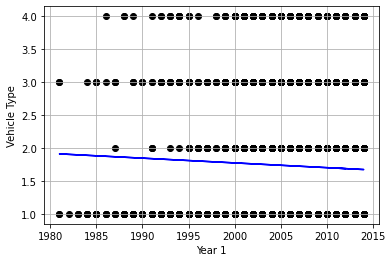

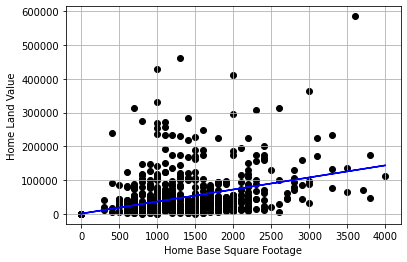

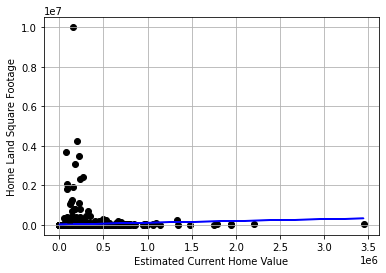

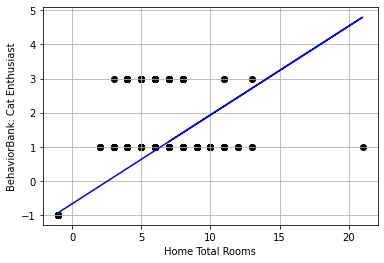

In [23]:
from task3_format_data import auto_csv_to_df, reformat_auto_data_vals, categorical_to_numerical
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

USED_AUTO_DATA_PATH = "/content/UsedAutoRELEVATEfirst10000-noLatLong.csv"


def extract_names(xn, yn, dframe):
    comp_df = dframe[[xn, yn]]
    comp_df = comp_df.dropna()
    comp_df = comp_df[(comp_df != 0).all(1)]

    xarr = comp_df[xn].to_numpy()
    yarr = comp_df[yn].to_numpy()

    return xarr, yarr


def run_and_plot_regression(x, y, x_name, y_name):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2)

    reg = LinearRegression()
    reg.fit(x_train.reshape(-1, 1), y_train)
    y_pred = reg.predict(x_test.reshape(-1, 1))

    plt.scatter(x_test, y_test, color='black')
    plt.plot(x_test, y_pred, color='blue')
    plt.xticks()
    plt.yticks()
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.grid()
    plt.show()


if __name__ == '__main__':
    df = auto_csv_to_df(USED_AUTO_DATA_PATH)
    df = reformat_auto_data_vals(df)
    df = categorical_to_numerical(df)

    x_names = ['Year 1', 'Home Base Square Footage', 'Estimated Current Home Value', 'Home Total Rooms']
    y_names = ['Vehicle Type', 'Home Land Value', 'Home Land Square Footage', 'BehaviorBank: Cat Enthusiast']

    for i in range(len(x_names)):
        x, y = extract_names(x_names[i], y_names[i], df)

        run_and_plot_regression(x, y, x_names[i], y_names[i])

## Bibliography

1. https://www.theanalysisfactor.com/wide-and-long-data/
2. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
3. https://scikit-learn.org/stable/modules/naive_bayes.html
4. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html#sklearn.linear_model.PassiveAggressiveClassifier
5. https://scikit-learn.org/stable/modules/svm.html
6. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html